In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("path_coord.csv")
df

,x,y,z,theta
0,0.00000,0,0.000000,-1.57080
1,-3.47189,0,0.000377,-1.57079
2,-6.94377,0,0.000761,-1.57079
3,-10.41570,0,0.001154,-1.57079
4,-13.88750,0,0.001553,-1.57079
...,...,...,...,...
3507141,30313.20000,0,291.119000,1.55178
3507142,30316.70000,0,291.185000,1.55177
3507143,30320.20000,0,291.252000,1.55177
3507144,30323.60000,0,291.318000,1.55177


In [4]:
Gamma = 1.4
phi = 0
R_gas = 287.05
Troposphere_Lapse_Rate = 6.5
Tropopause_Height = 18000
Tropopause_Temperature = 216.65

def temperature(z):
    return np.where(z <= Tropopause_Height, 300 - (Troposphere_Lapse_Rate / 1000) * z, Tropopause_Temperature)

def vel_c(z):
    return np.sqrt(Gamma * R_gas * temperature(z))

# Assuming df is your DataFrame and it contains columns 'z' and 'theta'
# Calculate velocity components
df['v_x'] = vel_c(df['z']) * np.sin(df['theta']) * np.cos(phi)
df['v_y'] = vel_c(df['z']) * np.sin(df['theta']) * np.sin(phi)
df['v_z'] = vel_c(df['z']) * np.cos(df['theta'])


df['res_v'] =  np.sqrt(np.square(df['v_x'])+np.square(df['v_y'])+np.square(df['v_z']))

In [13]:
df

,x,y,z,theta,v_x,v_y,v_z,res_v
0,0.00000,0,0.000000,-1.57080,-347.218951,-0.0,-0.001275,347.218951
1,-3.47189,0,0.000377,-1.57079,-347.218950,-0.0,0.002197,347.218950
2,-6.94377,0,0.000761,-1.57079,-347.218948,-0.0,0.002197,347.218948
3,-10.41570,0,0.001154,-1.57079,-347.218947,-0.0,0.002197,347.218947
4,-13.88750,0,0.001553,-1.57079,-347.218945,-0.0,0.002197,347.218945
...,...,...,...,...,...,...,...,...
3507141,30313.20000,0,291.119000,1.55178,346.059583,0.0,6.581575,346.122163
3507142,30316.70000,0,291.185000,1.55177,346.059268,0.0,6.585031,346.121914
3507143,30320.20000,0,291.252000,1.55177,346.059015,0.0,6.585027,346.121662
3507144,30323.60000,0,291.318000,1.55177,346.058766,0.0,6.585022,346.121413


In [5]:
df.describe()

,x,y,z,theta,v_x,v_y,v_z,res_v
count,3.507146e+06,3507146.0,3.507146e+06,3.507146e+06,3.507146e+06,3507146.0,3.507146e+06,3.507146e+06
mean,-4.100092e-13,0.0,8.896516e+03,-5.637751e-16,-4.632188e-14,0.0,1.982233e+02,3.157549e+02
std,1.173226e+04,0.0,6.833504e+03,9.019133e-01,2.289262e+02,0.0,9.202778e+01,2.162579e+01
min,-3.032710e+04,0.0,0.000000e+00,-1.570800e+00,-3.472190e+02,0.0,-1.275406e-03,2.711867e+02
25%,-7.358795e+03,0.0,2.934720e+03,-7.792620e-01,-2.153901e+02,0.0,1.260679e+02,2.950680e+02
50%,-7.341150e-11,0.0,7.529610e+03,-5.474445e-15,-1.607755e-12,-0.0,2.180804e+02,3.176358e+02
75%,7.358795e+03,0.0,1.387320e+04,7.792620e-01,2.153901e+02,-0.0,2.781938e+02,3.359986e+02
max,3.032710e+04,0.0,2.660040e+04,1.570800e+00,3.472190e+02,0.0,3.472190e+02,3.472190e+02


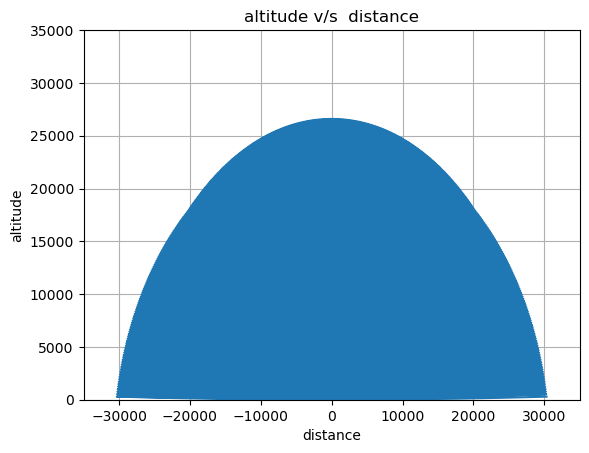

In [7]:
plt.plot(df['x'],df['z'])

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title("altitude v/s  distance")
plt.xlabel("distance")
plt.ylabel("altitude")
plt.set_cmap("gist_rainbow") 
plt.grid()
plt.show()

In [ ]:
sns.scatterplot(data=df, x="x", y="y", hue="res_v", cmap='viridis')

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title("altitude v/s  distance")
plt.xlabel("distance")
plt.ylabel("altitude")
plt.set_cmap("gist_rainbow") 
plt.grid()
plt.show()

In [ ]:
sns.pointplot(data=df, x=df['x'], y=df['z'])


In [9]:
75/180

0.4166666666666667

In [10]:
180 * 0.4166666666666667

75.0

In [11]:
np.sqrt(300*287*1.4)

347.18870949384285

In [12]:
273 + 27 - 6.5 * 18

183.0